In [9]:
import pandas as pd
url = "https://raw.githubusercontent.com/ghobadian/house_price_regression/master/dataset.csv"
df =pd.read_csv(url)
print(df.head())
print(df.info())

  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price   

In [17]:
#data cleaning
df.dropna(subset=['Address'], inplace=True)
df['Area'] = df['Area'].astype(str).str.replace(',', '')
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   int64  
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 172.1+ KB
None


In [21]:
pd.options.display.float_format = '{:.0f}'.format
print(df.describe())

             Area  Room       Price  Price(USD)
count        3456  3456        3456        3456
mean      8802191     2  5379956887      179332
std     317778302     1  8121729348      270724
min            30     0     3600000         120
25%            69     2  1420000000       47333
50%            90     2  2900000000       96667
75%           121     2  6000000000      200000
max   16160000000     5 92400000000     3080000


In [27]:
df = df[(df['Area'] > 30) & (df['Area'] < 1000)]
df = df[df['Price'] > 100000000]
print(df.describe())

       Area  Room       Price  Price(USD)
count  3260  3260        3260        3260
mean    109     2  5667238160      188908
std      71     1  8266460567      275549
min      32     0   505000000       16833
25%      70     2  1680000000       56000
50%      92     2  3100000000      103333
75%     125     3  6300000000      210000
max     929     5 92400000000     3080000


In [33]:
#price per meter
df['PPP'] = df['Price'] / df['Area']
expensive_areas = df.groupby('Address')['PPP'].mean().sort_values(ascending=False)
print(expensive_areas.head(10))
print("محله های ارزان")
print(expensive_areas.tail(10))

Address
Gandhi       140000000
Vanak        127415595
Lavasan      117291667
Zaferanieh   113713878
Elahieh      112212585
Velenjak     111679896
Kamranieh    103624318
Niavaran     102780619
Farmanieh    102329787
Aqdasieh      90885861
Name: PPP, dtype: float64
محله های ارزان
Address
Baghestan            8248945
Ghiyamdasht          8205128
Chardangeh           8000000
Pakdasht             7854598
Hassan Abad          7846154
Shahrake Madaen      7476636
Shahedshahr          7250000
Salehabad            6818182
Vahidiyeh            6523256
Varamin - Beheshti   4666667
Name: PPP, dtype: float64


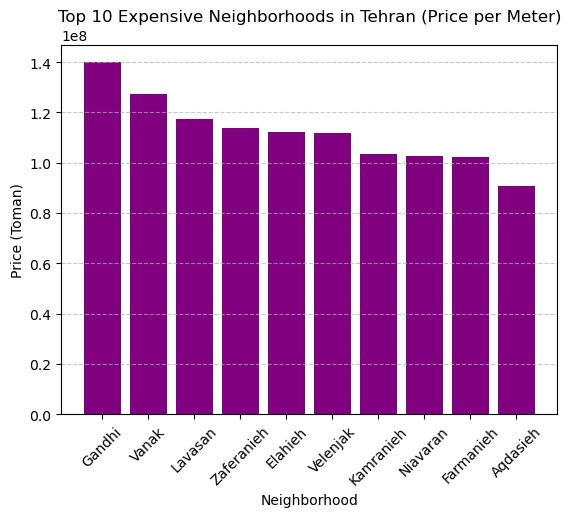

In [35]:
#visualize
import matplotlib.pyplot as plt
top_10 = expensive_areas.head(10)
top_10 = expensive_areas.head(10)
plt.bar(top_10.index, top_10.values, color='purple')
plt.title("Top 10 Expensive Neighborhoods in Tehran (Price per Meter)")
plt.xlabel("Neighborhood")
plt.ylabel("Price (Toman)")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  

plt.show()

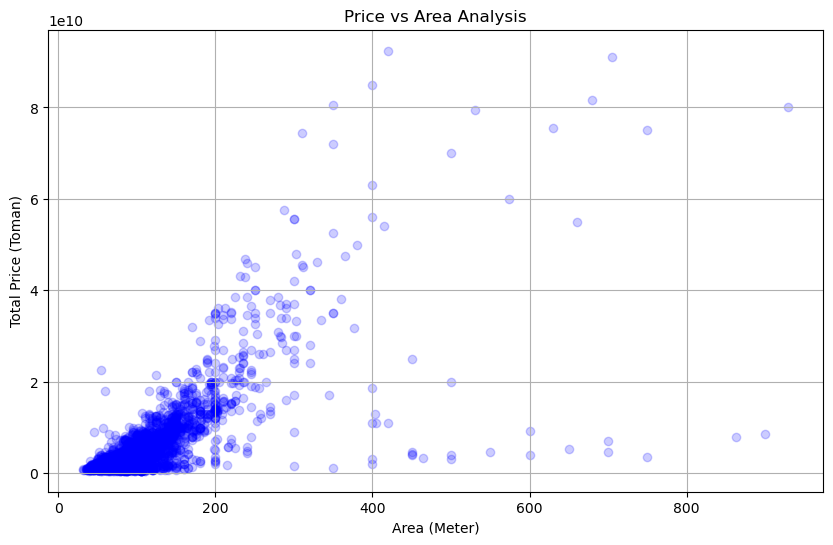

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Price'], alpha=0.2, c='blue')
plt.title("Price vs Area Analysis")
plt.xlabel("Area (Meter)")
plt.ylabel("Total Price (Toman)")
plt.grid(True)

plt.show()